#Bagging & Boosting KNN & Stacking       

1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?       
  - Ensemble techniques in Machine Learning combine multiple individual models (called weak learners) to create one powerful predictive model.      
  Theyu key concept is that a group of weak models can perform better together than any single model alone.       
  Ensemble methods aim to improve model accuracy, stability, and generalization by reducing bias and variance.      
  Bagging:     
  . Builds many Decision Trees on random subsets of data and averages their predictions.     
  . Focuses on reducing variance.     
  Boosting:     
  . Builds trees one by one, where each next tree focuses on the errors of the previous trees.    
  . Focuses on reducing bias.       
  



2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.       
  - A Decision Tree often suffers from overfitting, meaning it learns the training data too well - including noise and outliers - which leads to poor performance on unseen data.       
  A Random Forest overcomes this by combining the predictions of multiple Decision Trees, each trained on different random subsets of data and features.     
  This ensemble approach helps the model generalize better and reduces the impact of noise from any single tree.     
  How Random Forest Reduces Overfitting:        
  . Random Sampling of Data (Bootstrap Sampling):      
  Each tree is trained on a random subset of the training data. This introduces diversity and prevents all trees from seeing the same data.      
  . Random Feature Selection:     
  At each split in a tree, only a random subset of features is considered.      
  This ensures that not all trees focus on the smae dominant features, reducing correlation among them.      
  . Averaging Results:     
  The final prediction is made by averaging (for regression) or majority voting (for classification) across all trees.     
  Averaging smooths out extreme predictions from individual trees, reducing variance and improving stability.     
  

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.       
  - Stacking combines predictions from different types of models (Decision Tree, SVM, Logistic Regression) using a meta-model that learns how to best blend their outputs.      
  . It trains multiple diverse base models in parallel.     
  . Their predictions are used as input features for a final model (meta-learner).      
  . The meta-learner learns how to weigh or combine these predictions for final output.      
  . It usually gives better accuracy since it leverages strenghts of multiple algorithms.      
  . It can handle both classification and regression tasks.       
  Bagging:        
  Bagging trains multiple instances of the same model on different random subsets of the data (created by bootstrapping) and combines their results(majority vote or average).        
  Boosting:      
  Boosting builds an ensemble sequentially, where each new model focuses on correcting errors made by previous models.     
  

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 42)

stack = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()), ("svc", SVC(probability = True))],
    final_estimator = LogisticRegression()
)
stack.fit(X_train, y_train)
print("Accuracy:", stack.score(X_test, y_test))

Accuracy: 1.0


4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?      
  - OOB (Out of Bag) Score is an internal validation method used in Random Forests.     
  When building each tree, Random Forest uses bootstrap sampling - meaning it randomly selects samples with replacement from the dataset.      
  . Above 63% of samples are used to train each tree.     
  . The remaining 37% (Out of Bag samples) are not used in training that specific tree.      
  After training, these OOB samples act like a validation set to test the model's performance on unseen data.       
  No need for a separate  valication set - OOB score gives an unbiased estimate of model accuracy.    
  Saves data - all samples are used efficiently for both training and validation.      
  Detects overfitting - if training accuracy is high but OOB score is low, the model may be overfitting.      
  Each data point is predicted  only by the trees that did not see it during training.     
  These predictions are aggregated to calculate the OOB Accuracy Score.         
  It serves as a built-in cross-validation for Random Forest.      
  

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y = True)

model = RandomForestClassifier(n_estimators =100, oob_score = True, random_state = 42)
model.fit(X, y)

print("OOB Score:", model.oob_score_)

OOB Score: 0.9533333333333334


5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases       
  - AdaBoost (Adaptive Boosting):       
  AdaBoost combines multiple weak learners by giving more weight to misclassified samples in each iteration. Each new model focuses on the errors made by previous ones, and all models are combined with weighted voting. It's simple and works well on clean data but is sensitive to noise.      
  Gradient Boosting:       
  Gradient Boosting builds models sequentially to minimize prediction errors using gradient descent. Instead of reweighting samples, it fits new learners to the residuals (errors) of previous models. It's mode flexible, powerful, and forms the base for advanced models like XGBoost and CatBoost.     
  Error Handling: AdaBoost reweights samples; Gradient Boosting reduces residuals.      
  Mechanism: AdaBoost adjusts weights; Gradient Boosting uses gradients.      
  Use Case: AdaBoost for simple, clean data; Gradient Boosting for complex, non-linear data.     
  

In [2]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

print("AdaBoost Accuracy:", accuracy_score(y_test, ada.predict(X_test)))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb.predict(X_test)))


AdaBoost Accuracy: 0.9259259259259259
Gradient Boosting Accuracy: 0.9074074074074074


6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.      
  - CatBoost (Categorical Boosting) is a gradient boosting algorithm specially designed to handle categorical (non-numeric) data efficiently.      
  Unlike other models (like XGBoost or LightGBM), CatBoost does not require one-hot encoding or label encoding.      
  It uses a technique called “ordered target statistics” — it replaces each categorical value with a numerical statistic (like mean target value) computed in an ordered, unbiased way to prevent overfitting.        
  This allows CatBoost to preserve category relationships, reduce data leakage, and improve accuracy on datasets with many categorical features.

In [4]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Assume first two columns are categorical
cat_features = [0, 1]

# Train CatBoost model
model = CatBoostClassifier(iterations=100, depth=4, learning_rate=0.1, verbose=0)
model.fit(X, y, cat_features=cat_features)

print("Model trained successfully with automatic categorical handling!")


7. KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:       
. Load the Wine dataset (sklearn.datasets.load_wine()).      
. Split data into 70% train and 30% test.      
. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)    
. Apply StandardScaler, retrain KNN, and compare metrics.       
. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).     
Train the optimized KNN and compare results with the unscaled/scaled versions.       
  - K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for classification and regression. It classifies a new data point based on the majority class among its K nearest neighbors.      
  However, since KNN is distance-based, feature scaling (like StandardScaler) is crucial — otherwise, features with larger ranges can dominate the distance calculation.      
  We can further improve KNN’s performance using GridSearchCV to find the best K value and distance metric.

In [6]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset
X, y = load_wine(return_X_y=True)

# Step 2: Split data into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train KNN without scaling (default K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 4: Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== With Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 5: Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("\n=== Best Parameters from GridSearchCV ===")
print(grid.best_params_)

# Step 6: Train optimized KNN and compare results
best_knn = grid.best_estimator_
y_pred_opt = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))


=== Without Scaling ===
Accuracy: 0.7407407407407407

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


=== With Scaling ===
Accuracy: 0.9629629629629629

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


=== Best Parameters from GridSearchCV ===
{'metric': 'manhattan', 'n_neighbors': 1}

8.  PCA + KNN with Variance Analysis and Visualization
Task:     
. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).      
. Apply PCA and plot the scree plot (explained variance ratio).      
. Retain 95% variance and transform the dataset.      
. Train KNN on the original data and PCA-transformed data, then compare
accuracy.      
. Visualize the first two principal components using a scatter plot (color by class).      
  - Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a smaller number of components while preserving most of the variance (information).     
  It helps remove noise, reduce overfitting, and improve model efficiency.       
  In this task, we apply PCA to the Breast Cancer dataset, retain 95% of total variance, and train a KNN classifier both before and after PCA to compare performance.      
  We also visualize how the first two principal components separate different classes.


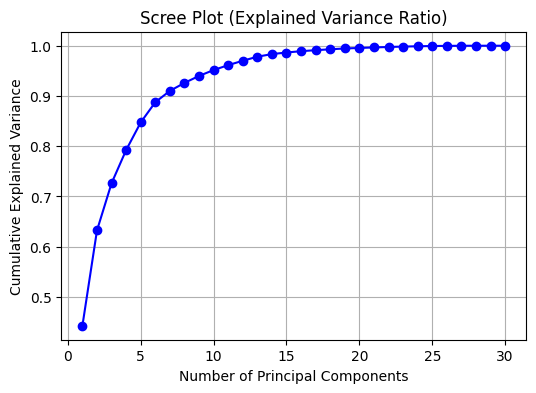

Number of components retained for 95% variance: 10

KNN Accuracy (Original Data): 0.959
KNN Accuracy (PCA Data): 0.965


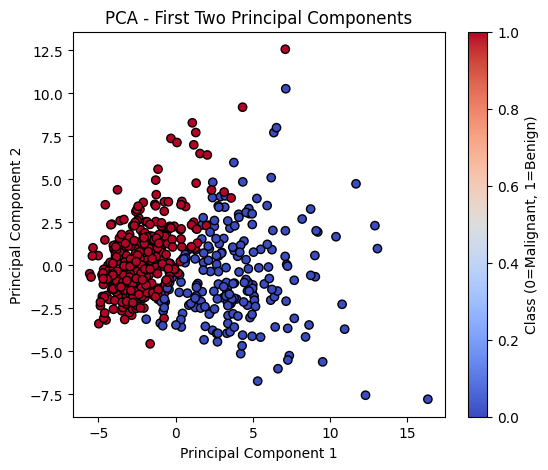

In [7]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', color='blue')
plt.title("Scree Plot (Explained Variance Ratio)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Step 4: Retain 95% variance and transform data
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print("Number of components retained for 95% variance:", pca_95.n_components_)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 6: Train KNN on original data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 7: Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\nKNN Accuracy (Original Data):", round(acc_original, 3))
print("KNN Accuracy (PCA Data):", round(acc_pca, 3))

# Step 8: Visualize first two principal components
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class (0=Malignant, 1=Benign)")
plt.show()


9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:     
. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).     
. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.      
. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.      
  - K-Nearest Neighbors (KNN) Regressor predicts the value of a new data point by averaging the target values of its K nearest neighbors.     
  The distance metric determines how “closeness” between points is measured:     
  Euclidean distance – straight-line distance.      
  Manhattan distance – sum of absolute differences (more robust to outliers).     
  The K value controls bias and variance:    
  Small K → low bias, high variance (overfitting).     
  Large K → high bias, low variance (underfitting).      
  We will compare models using Mean Squared Error (MSE) and analyze how changing K affects performance.

MSE (Euclidean, K=5): 4803.906
MSE (Manhattan, K=5): 5210.226


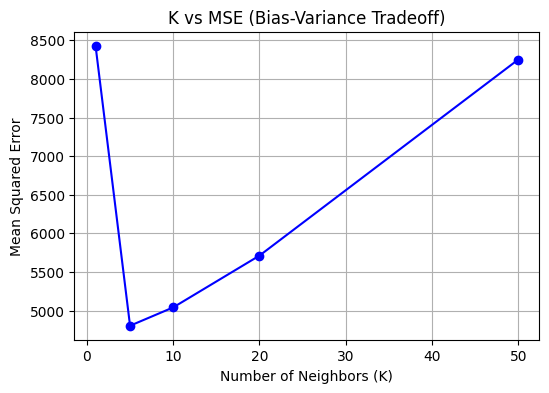

In [8]:
# Import required libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2a: KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 2b: KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean, K=5): {mse_euclidean:.3f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.3f}")

# Step 3: Analyze K vs MSE (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot K vs MSE
plt.figure(figsize=(6,4))
plt.plot(k_values, mse_values, marker='o', color='blue')
plt.title("K vs MSE (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:      
. Load the Pima Indians Diabetes dataset (contains missing values).     
. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.     
. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree     
. Compare their training time and accuracy.      
. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv         
  


BRUTE → Accuracy: 0.693, Training Time: 0.0099 sec
KD_TREE → Accuracy: 0.693, Training Time: 0.0136 sec
BALL_TREE → Accuracy: 0.693, Training Time: 0.0165 sec

Best Performing Method: BRUTE


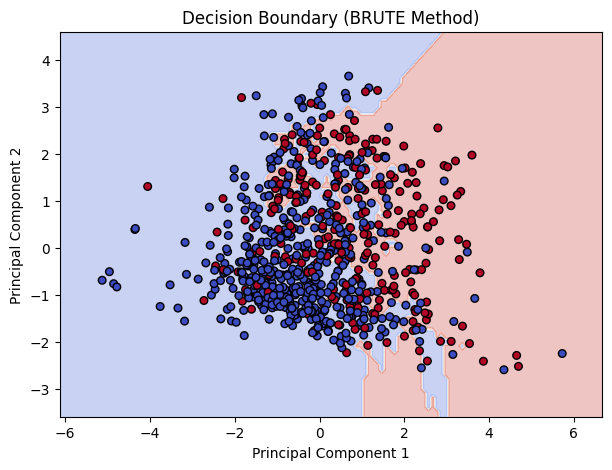

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

# Step 2: Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split features and target
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Train KNN models with different algorithms
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    duration = time.time() - start
    results[method] = (acc, duration)
    print(f"{method.upper()} → Accuracy: {acc:.3f}, Training Time: {duration:.4f} sec")

# Step 4: Identify best-performing method
best_method = max(results, key=lambda k: results[k][0])
print("\nBest Performing Method:", best_method.upper())

# Step 5: Decision boundary (using two most important features)
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn.fit(X_train2, y_train2)

# Plot decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=30)
plt.title(f"Decision Boundary ({best_method.upper()} Method)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
